# ANN for MNIST Data for Classification 

In [26]:
# It is gonna be a multiclass classification

# They are grayscale images

import tensorflow as tf

In [27]:
# chcking the version of the tensorflow 

print(tf.__version__)

2.1.0


In [28]:
# getting the mnist dataset from the datasets module

my_mnist1 = tf.keras.datasets.mnist

In [29]:
print(my_mnist1)

<module 'tensorflow_core.keras.datasets.mnist' from 'D:\\Installed_Tools\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>


---

Loading the mnist dataset 

In [30]:
# after loading you will get two tuples which will have training dataset and other is the testing dataset

(x_train, y_train) , (x_test, y_test) = my_mnist1.load_data()

---

Normalizing the Data 

In [31]:
# Normalizing the data by dividing the data with 255

x_train, x_test = x_train/255.0 , x_test/255.0

In [32]:
# getting the shape of the data

print(x_train.shape)       # Data is N x 28 x 28, where N = 60000

(60000, 28, 28)


In [33]:
print(x_test.shape)

(10000, 28, 28)


---

### Now, Building the Model

In [34]:
my_model1 = tf.keras.models.Sequential([
                                        tf.keras.layers.Flatten(input_shape = (28,28)),
                                        tf.keras.layers.Dense(128, activation = "relu"),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Dense(10, activation = "softmax")
                                        ])

# 1. flattening the data from N x 28 x 28 to N x 784 which is a 2D data
# 2. Dense layer is the actual layer which do the linear transformation with 128 output
# 3. Dropout is used for regularization

---

## Compiling the Model

In [35]:
my_model1.compile(optimizer='adam',
                 loss= 'sparse_categorical_crossentropy',
                 metrics=['accuracy'])

---

### Calling the fit function on the model

In [36]:
result1 = my_model1.fit(x_train, y_train, validation_data= (x_test, y_test), epochs=14)

Train on 60000 samples, validate on 10000 samples
Epoch 1/14
60000/60000 [==============================] - 2s 39us/sample - loss: 0.2985 - accuracy: 0.9129 - val_loss: 0.1399 - val_accuracy: 0.9573
Epoch 2/14
60000/60000 [==============================] - 3s 42us/sample - loss: 0.1435 - accuracy: 0.9570 - val_loss: 0.0931 - val_accuracy: 0.9709
Epoch 3/14
60000/60000 [==============================] - 2s 36us/sample - loss: 0.1086 - accuracy: 0.9669 - val_loss: 0.0867 - val_accuracy: 0.9730
Epoch 4/14
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0897 - accuracy: 0.9727 - val_loss: 0.0755 - val_accuracy: 0.9755
Epoch 5/14
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0772 - accuracy: 0.9749 - val_loss: 0.0763 - val_accuracy: 0.9769
Epoch 6/14
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0657 - accuracy: 0.9797 - val_loss: 0.0724 - val_accuracy: 0.9779
Epoch 7/14
60000/60000 [==============================] 

---

### Getting the loss per Iterations

In [37]:
import matplotlib.pyplot as plt

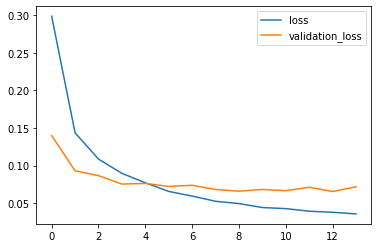

In [38]:
plt.plot(result1.history['loss'], label = 'loss')
plt.plot(result1.history['val_loss'], label = 'validation_loss')
plt.legend()

---

### Accuracy per Iterations

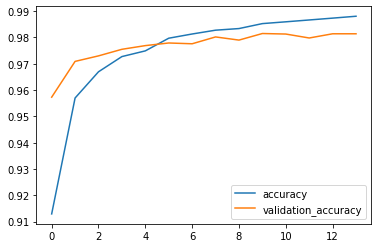

In [39]:
plt.plot(result1.history['accuracy'], label = 'accuracy')
plt.plot(result1.history['val_accuracy'], label = 'validation_accuracy')
plt.legend()

---

### Evaluation 

In [40]:
print(my_model1.evaluate(x_test, y_test)) # evaluate function will tell the loss and accuracy.

10000/10000 [==============================] - 0s 22us/sample - loss: 0.0719 - accuracy: 0.9814
[0.07185587295795412, 0.9814]


---

## Plotting the Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [48]:
import numpy as np
import pandas as pd

import itertools

Confusion matrix without Implementing Normalization
[[ 971    1    1    1    0    1    2    2    1    0]
 [   0 1126    4    0    0    1    1    0    3    0]
 [   4    1 1016    0    2    0    1    3    5    0]
 [   0    0    0 1002    0    2    0    2    1    3]
 [   0    0    3    0  956    0    7    2    2   12]
 [   1    0    0   13    1  866    3    2    6    0]
 [   1    4    2    1    4    2  941    0    3    0]
 [   1    4    9    6    0    0    0  996    3    9]
 [   3    1    1    4    1    3    0    2  958    1]
 [   2    2    0    8    7    2    0    5    1  982]]


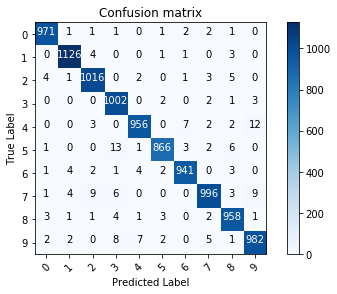

In [51]:
# creating the function

def plot_confusion_matrix(cm, classes, normalize = False, title = 'Confusion matrix',
                         cmap = plt.cm.Blues):
    
    '''
    This function is used for creating the confusion matrix
    and normalization can be achieved using normalize = True
    '''
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    
    else:
        print("Confusion matrix without Implementing Normalization")
        
    print(cm)    
    
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    fmt = '.2f' if normalize else 'd'
    
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                            horizontalalignment = "center",
                            color = "white" if cm[i,j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    
p_test = my_model1.predict(x_test).argmax(axis = 1)
cm = confusion_matrix(y_test, p_test)

plot_confusion_matrix(cm, list(range(10)))



Miss classification have happen in those case where digit has been written in such a way that it is difficult to differentiate. Example 9 is miss classified as 3 a lot. 5 has been miss classified as 3 a lot. 4 is miss classified as 9.
 
 ---

---

### Showing the miss classified examples


Text(0.5, 1.0, 'True Label : 2  |  Predicted Label : 7')

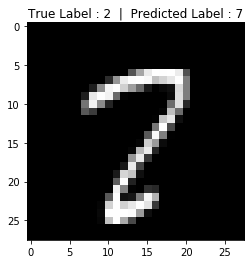

In [55]:
# geathering the index of miss classified numbers
misclassified_idx = np.where(p_test != y_test)[0]  # where function returns 2 things but we only want index hence [0]


# selecting randomly this miss classified indexes
i = np.random.choice(misclassified_idx)

plt.imshow(x_test[i], cmap = 'gray')   # cmap = 'gray' else hte image will appear as a heat map.

plt.title("True Label : %s  |  Predicted Label : %s" %(y_test[i], p_test[i]))

